Created by Jodhi Krisantus Sihalbu

jodhi1911253@itpln.ac.id

# **Holiday Package Prediction**
Menganalisa customer mana yang berpotensi untuk membeli paket wisata 'Wellness Tourism'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **EXPLORATORY DATA ANALYSIS (EDA)**

In [2]:
df = pd.read_csv(r"C:\Users\jodhi\Documents\RAKAMIN ACADEMY\FINAL PROJECT\DATASET\Travel.csv")
df

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0         200000          1  41.0     Self Enquiry         3              6.0   
1         200001          0  49.0  Company Invited         1             14.0   
2         200002          1  37.0     Self Enquiry         1              8.0   
3         200003          0  33.0  Company Invited         1              9.0   
4         200004          0   NaN     Self Enquiry         1              8.0   
...          ...        ...   ...              ...       ...              ...   
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0           Salaried  Female                       3                3.0   
1           Salaried    Male                       3                4.0   
2        Free Lancer    Male                       3                4.0   
3           Salaried  Female                       2                3.0   
4     Small Business    Male                       2                3.0   
...              ...     ...                     ...                ...   
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0            Deluxe                    3.0        Single            1.0   
1            Deluxe                    4.0      Divorced            2.0   
2             Basic                    3.0        Single            7.0   
3             Basic                    3.0      Divorced            2.0   
4             Basic                    4.0      Divorced            1.0   
...             ...                    ...           ...            ...   
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0            1                       2       1                       0.0   
1            0                       3       1                       2.0   
2            1                       3       0                       0.0   
3            1                       5       1                       1.0   
4            0                       5       1                       0.0   
...        ...                     ...     ...                       ...   
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
0            Manager        20993.0  
1            Manager        20130.0  
2          Executive        17090.0  
3          Executive        17909.0  
4          Executive        18468.0  
...              ...            ...  
4883         Manager        26576.0  
4884       Exe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**CHECK MISSING VALUE**

In [4]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
categorical = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']

**CHECK DATA DUPLIKAT dan VALUE COUNT (CATEGORICAL)**

**Temuan :**
1. Terdapat 4888 baris Data. Tidak Terdapat data duplikat. Setiap Baris Data tersebut berupa data setiap customer yang berbeda - beda disetiap orangnya

In [6]:
print('Banyak Data : ',df.shape)
print('Jumlah Id Customer Duplikat : ',df['CustomerID'].duplicated().sum())
print('Jumlah Data Duplikat',df.duplicated().sum())

Banyak Data :  (4888, 20)
Jumlah Id Customer Duplikat :  0
Jumlah Data Duplikat 0


**CHECK VALUE COUNT (CATEGORICAL)**

Terdapat Anomali / typo pada kolom gender **(Male,Female,Fe Male)**. Sehingga gender (Fe Male) harus diubah dahulu menjadi Female

In [7]:
for i in categorical:
    print(df[i].value_counts())

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


**FIXING GENDER   (`Fe Male`)  MENJADI `FeMale`**


In [8]:
print("Value count gender : \n", df['Gender'].value_counts())

Value count gender : 
 Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64


In [9]:
num = ['Age','DurationOfPitch','MonthlyIncome']
df[num].describe()

Age  DurationOfPitch  MonthlyIncome
count  4662.000000      4637.000000    4655.000000
mean     37.622265        15.490835   23619.853491
std       9.316387         8.519643    5380.698361
min      18.000000         5.000000    1000.000000
25%      31.000000         9.000000   20346.000000
50%      36.000000        13.000000   22347.000000
75%      44.000000        20.000000   25571.000000
max      61.000000       127.000000   98678.000000

### **1. UNIVARIATE ANALYSIS**

Product Taken :  (920, 20)
No Product Taken :  (3968, 20)


c:\Users\jodhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\jodhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\jodhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

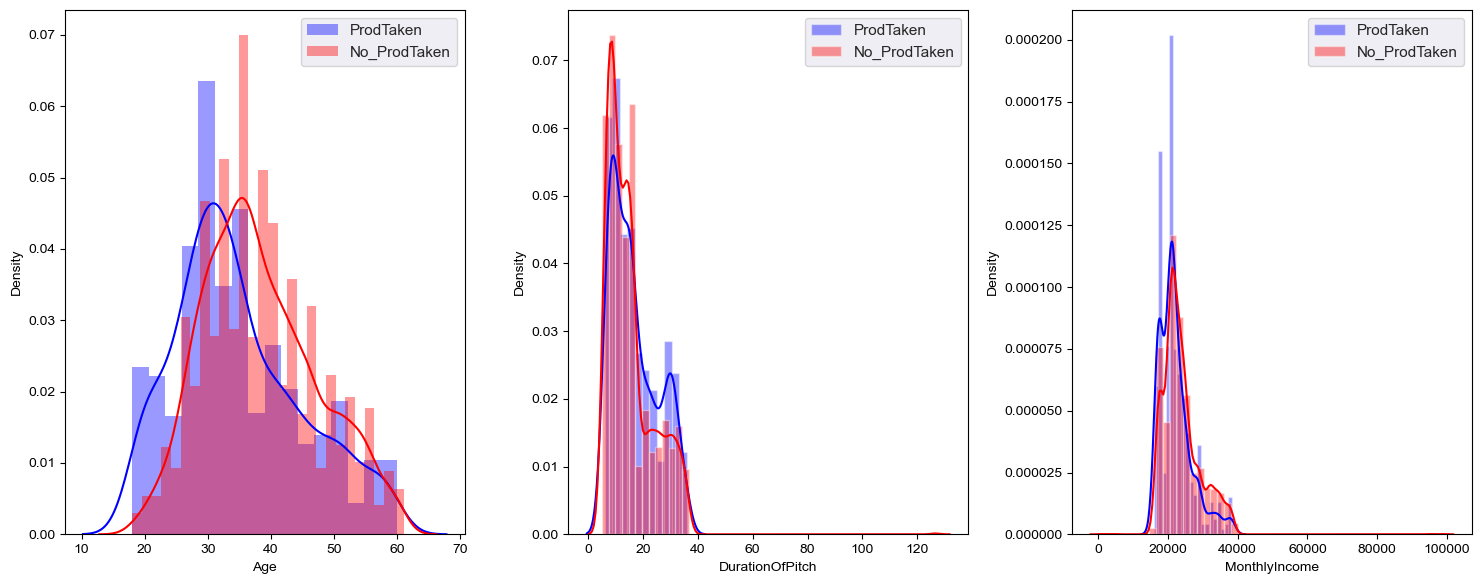

In [10]:
num = ['Age','DurationOfPitch','MonthlyIncome']
df_prodtaken = df[(df['ProdTaken']==1)]
df_no_prodtaken = df[(df['ProdTaken']==0)]

print('Product Taken : ',df_prodtaken.shape)
print('No Product Taken : ',df_no_prodtaken.shape)


fig, axes = plt.subplots(1,3, figsize=(15,6))

for i in range(len(num)):
    sns.distplot(df_prodtaken[num[i]], ax = axes[i],label='ProdTaken',color='blue') 
    sns.distplot(df_no_prodtaken[num[i]], ax = axes[i],label='No_ProdTaken',color='red')
    sns.set_theme(style="darkgrid", palette="pastel")

    axes[i].legend()

plt.tight_layout()
plt.show()

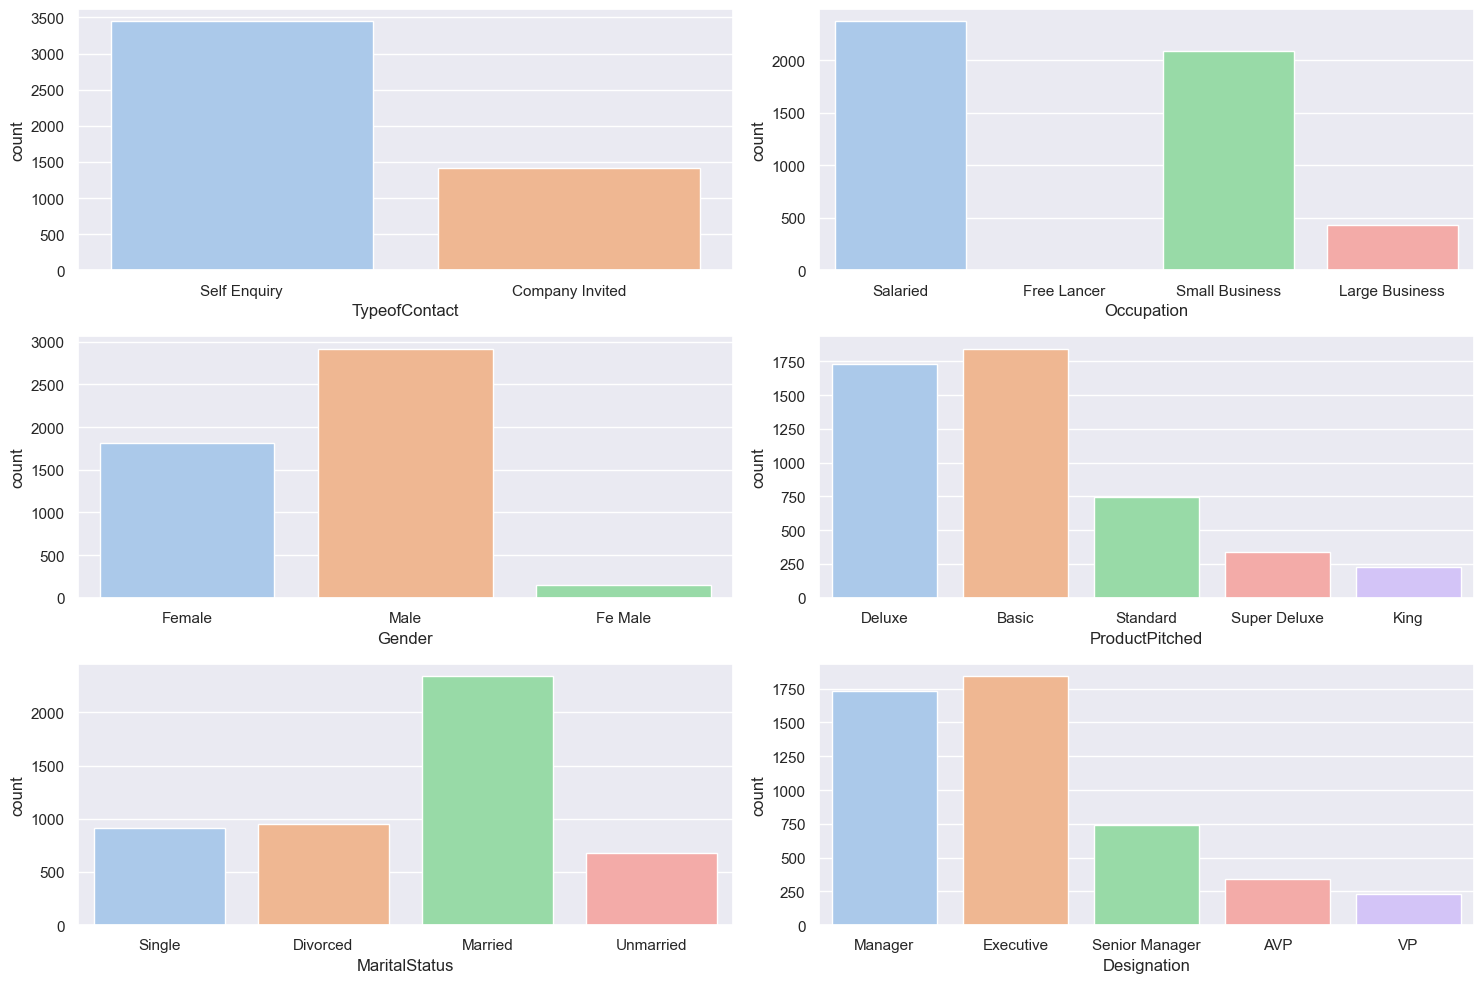

In [11]:
categorical = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
plt.figure(figsize=(15,10))
for i in range (len(categorical)):
    plt.subplot(3,2, i+1)
    sns.countplot(data=df, x=categorical[i])
    sns.set_theme(style="darkgrid", palette="pastel")
    plt.tight_layout()

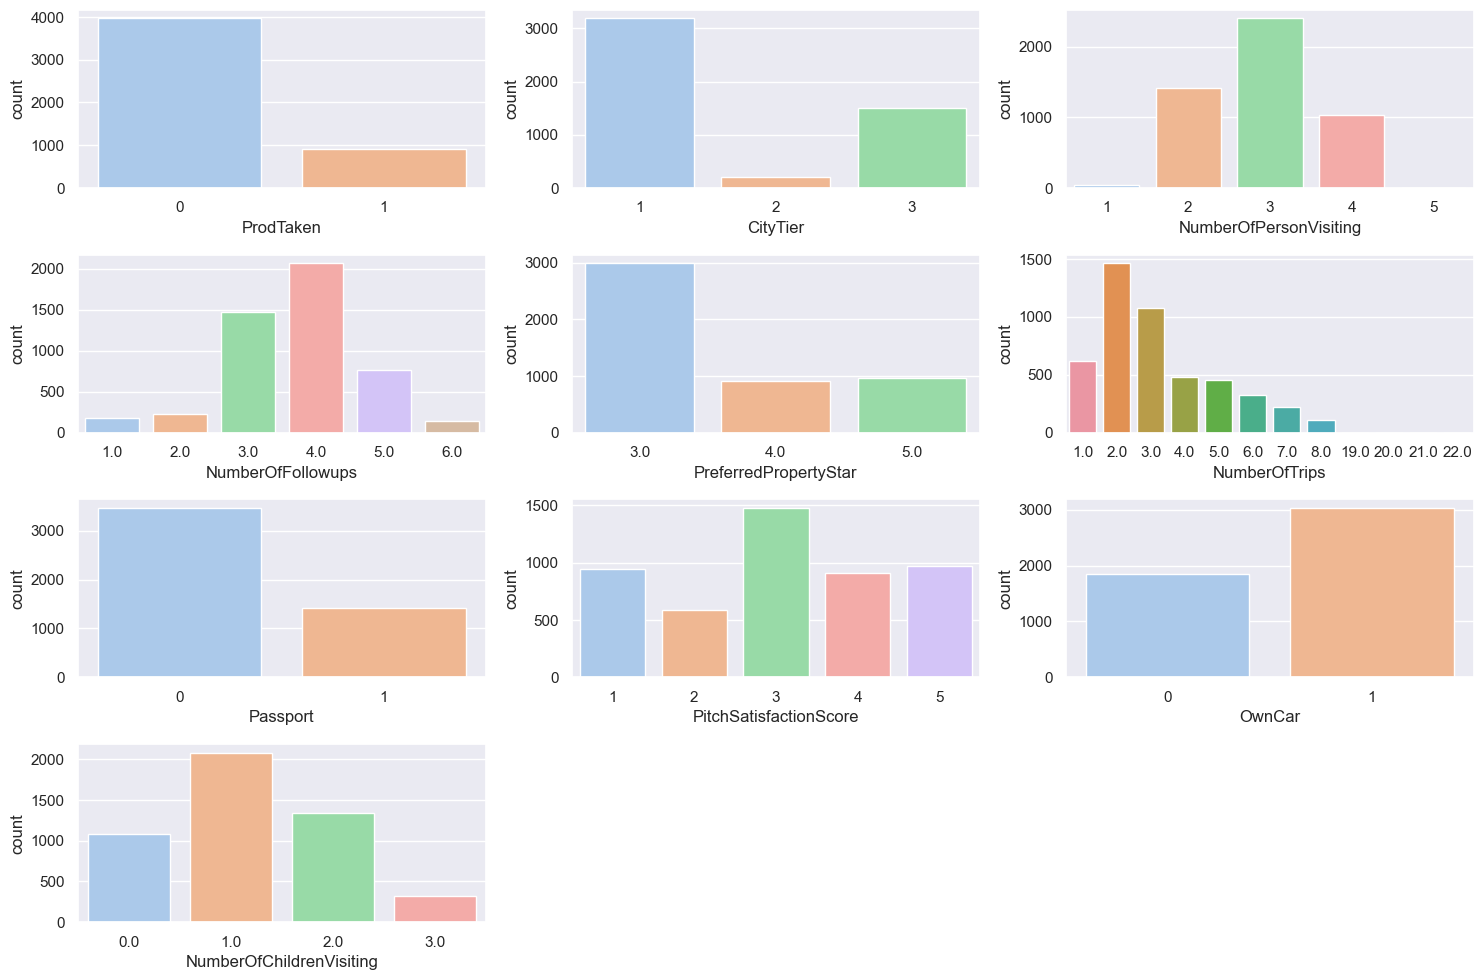

In [12]:
diskrit = ['ProdTaken','CityTier','NumberOfPersonVisiting','NumberOfFollowups',
           'PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore',
           'OwnCar', 'NumberOfChildrenVisiting']

plt.figure(figsize=(15,10))
for i in range(len(diskrit)):
    plt.subplot(4,3, i+1)
    sns.countplot(data=df, x=diskrit[i] )
    sns.set_theme(style="darkgrid", palette="pastel")
    plt.tight_layout()
    

### **2. BIVARIATE ANALYSIS**

Text(0.5, 1.0, 'No Product Taken')

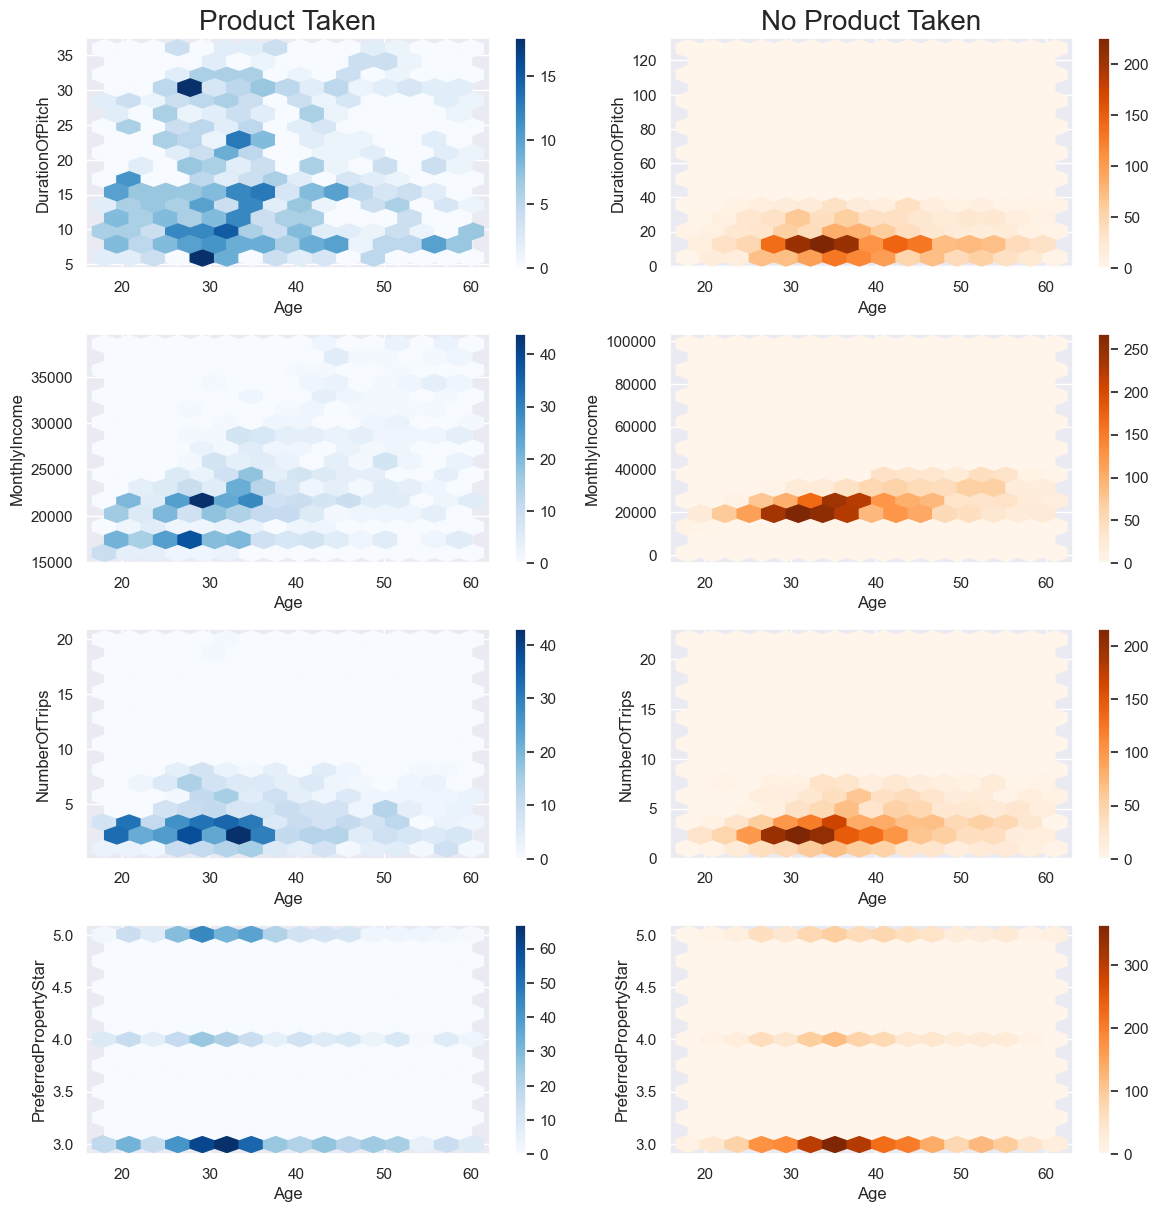

In [13]:
df_prodtaken = df[(df['ProdTaken']==1)]
df_no_prodtaken = df[(df['ProdTaken']==0)]

subset = ['DurationOfPitch','MonthlyIncome','NumberOfTrips','PreferredPropertyStar']

fig, axes = plt.subplots(4,2, figsize = (12,12))
for i in range(4):
    df_prodtaken.plot(kind='hexbin', x='Age', y=subset[i], gridsize=15, colormap='Blues',ax=axes[i,0],label='abb')
    df_no_prodtaken.plot(kind='hexbin', x='Age', y=subset[i], gridsize=15, colormap='Oranges', ax=axes[i,1],label='aa')
plt.tight_layout()
axes[0,0].set_title('Product Taken',fontsize=20)
axes[0,1].set_title('No Product Taken',fontsize = 20)

In [14]:
df.head(1)

CustomerID  ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0  Self Enquiry         3              6.0   

  Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0   Salaried  Female                       3                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0

### **3. MULTIVARIATE ANALYSIS**

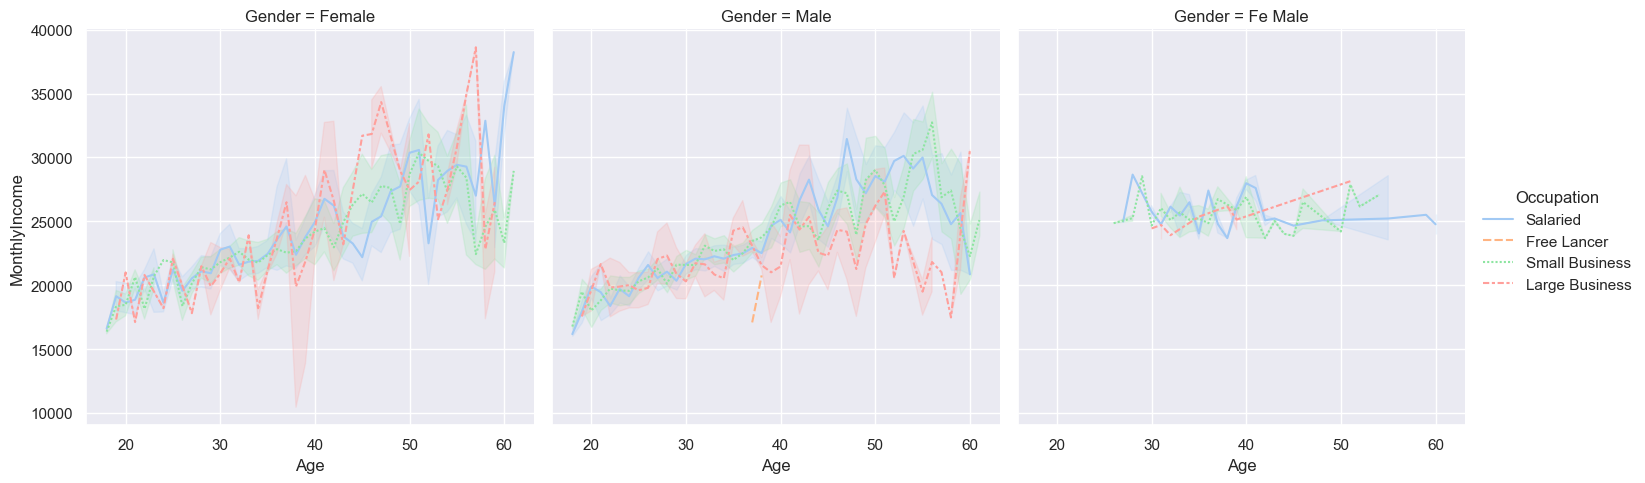

In [15]:
sns.relplot(data=df, x='Age',y='MonthlyIncome', kind='line',  col='Gender',hue='Occupation',style="Occupation")

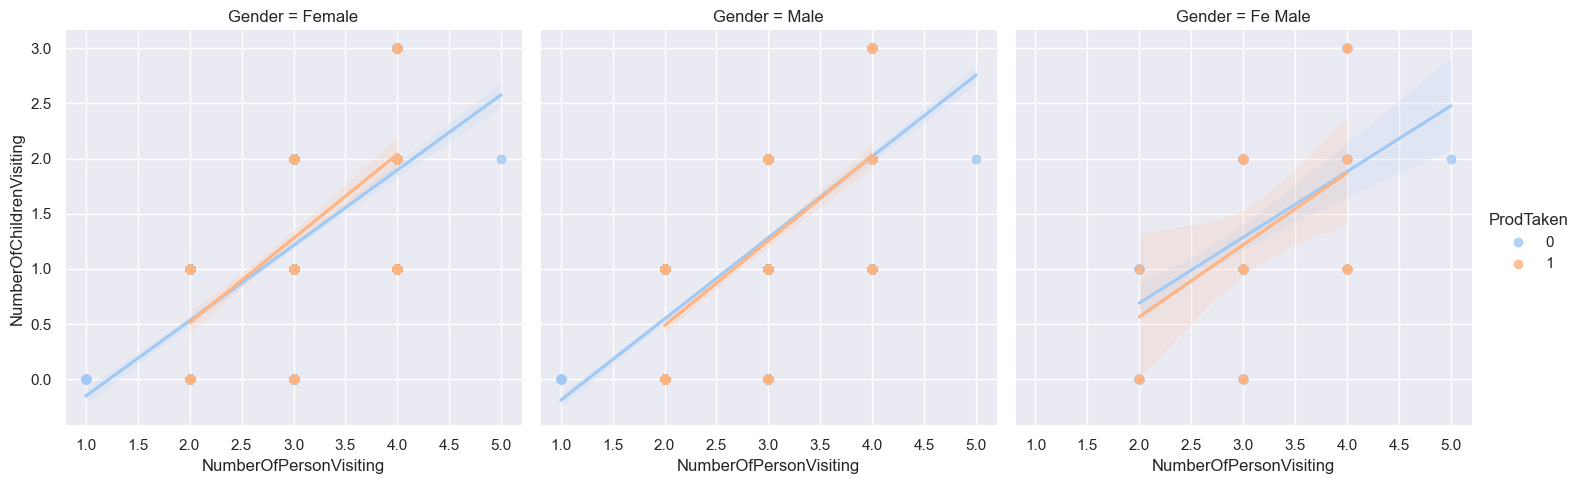

In [16]:
sns.lmplot(data=df,x='NumberOfPersonVisiting', y='NumberOfChildrenVisiting', hue='ProdTaken', col='Gender')

<AxesSubplot:>

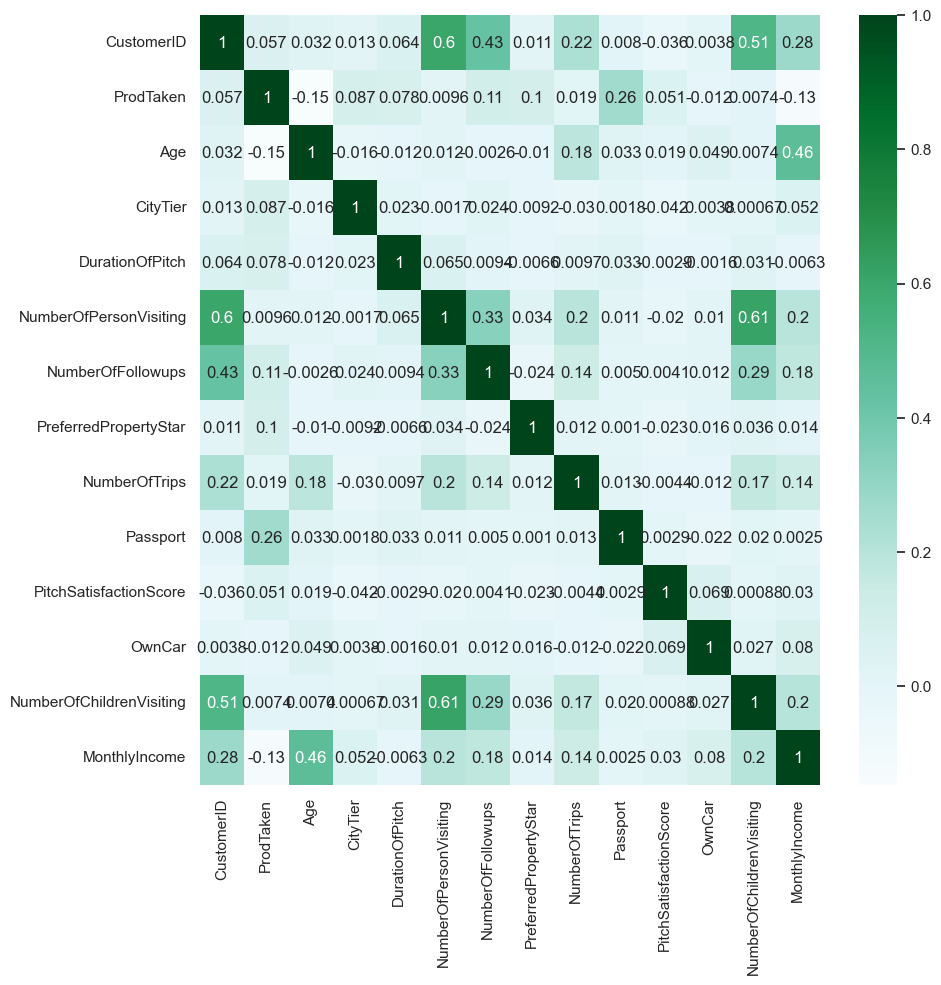

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='BuGn',annot=True)

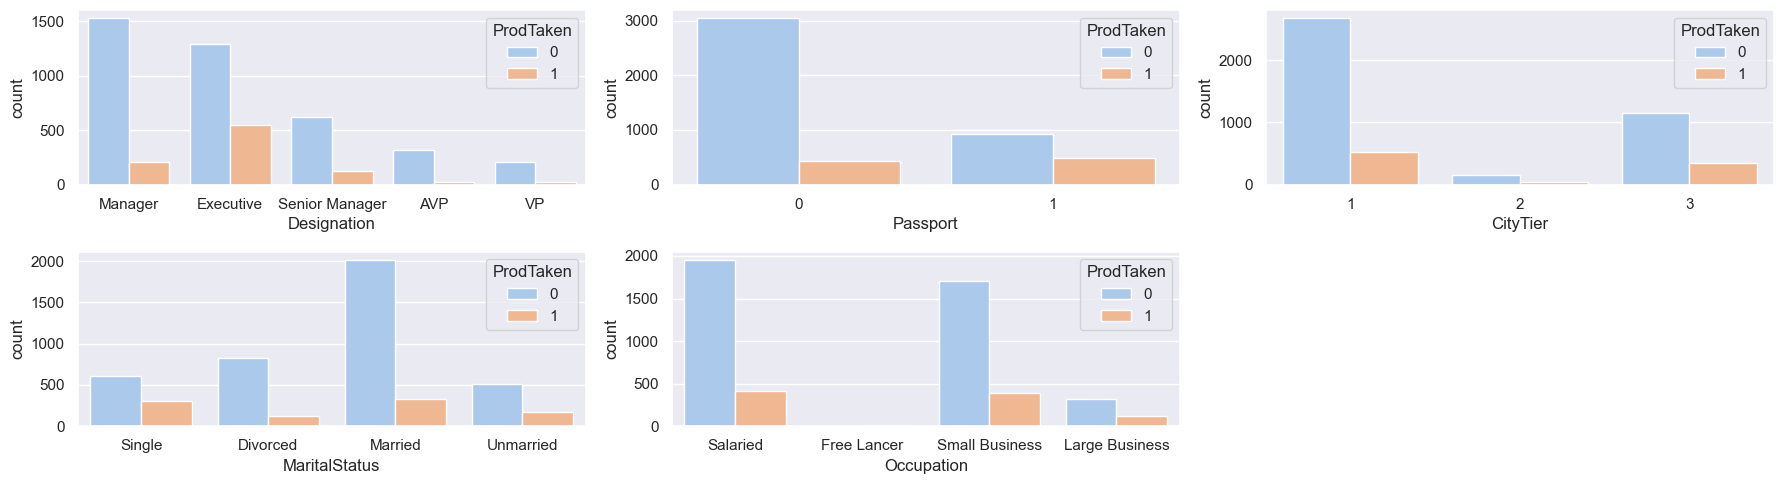

In [18]:
plt.figure(figsize=(18,5))
subset = ['Designation', 'Passport', 'CityTier', 'MaritalStatus', 'Occupation']
for  i in range(len(subset)):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=subset[i], hue='ProdTaken')
plt.tight_layout()


In [19]:
Designation_group = df.groupby(['Designation','ProdTaken'])[['CustomerID']].count().reset_index()

jumlah=pd.DataFrame(df['Designation'].value_counts())
jumlah=jumlah.reset_index()
jumlah.columns=['Designation','sum']
Designation_group = Designation_group.merge(jumlah, on='Designation')

Designation_group['ratio'] = Designation_group['CustomerID'] / Designation_group['sum'] * 100

ycoor = Designation_group[Designation_group['ProdTaken']==1]['ratio'].reset_index()
ycoor['ratio']

0     5.847953
1    29.967427
2    11.778291
3    16.711590
4     8.695652
Name: ratio, dtype: float64

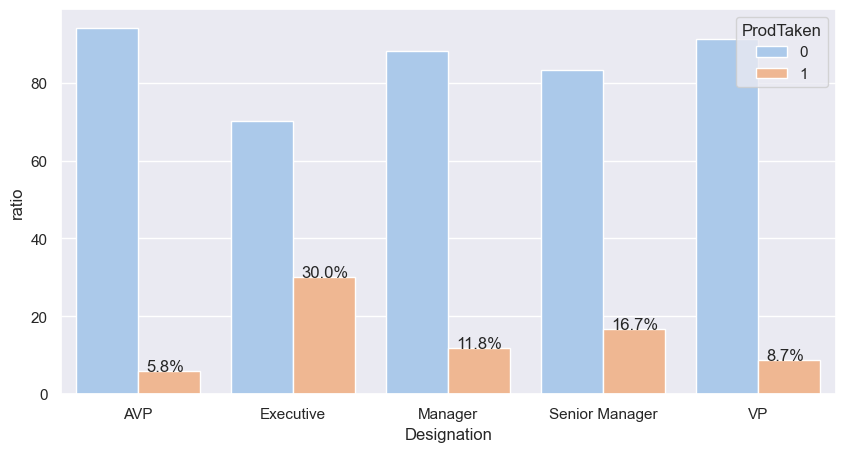

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(data=Designation_group, x='Designation',  y='ratio',hue='ProdTaken')
for i in range(5):
    plt.annotate(xy=[i+0.05,ycoor['ratio'][i]],text=str(round(ycoor['ratio'][i],1))+"%")

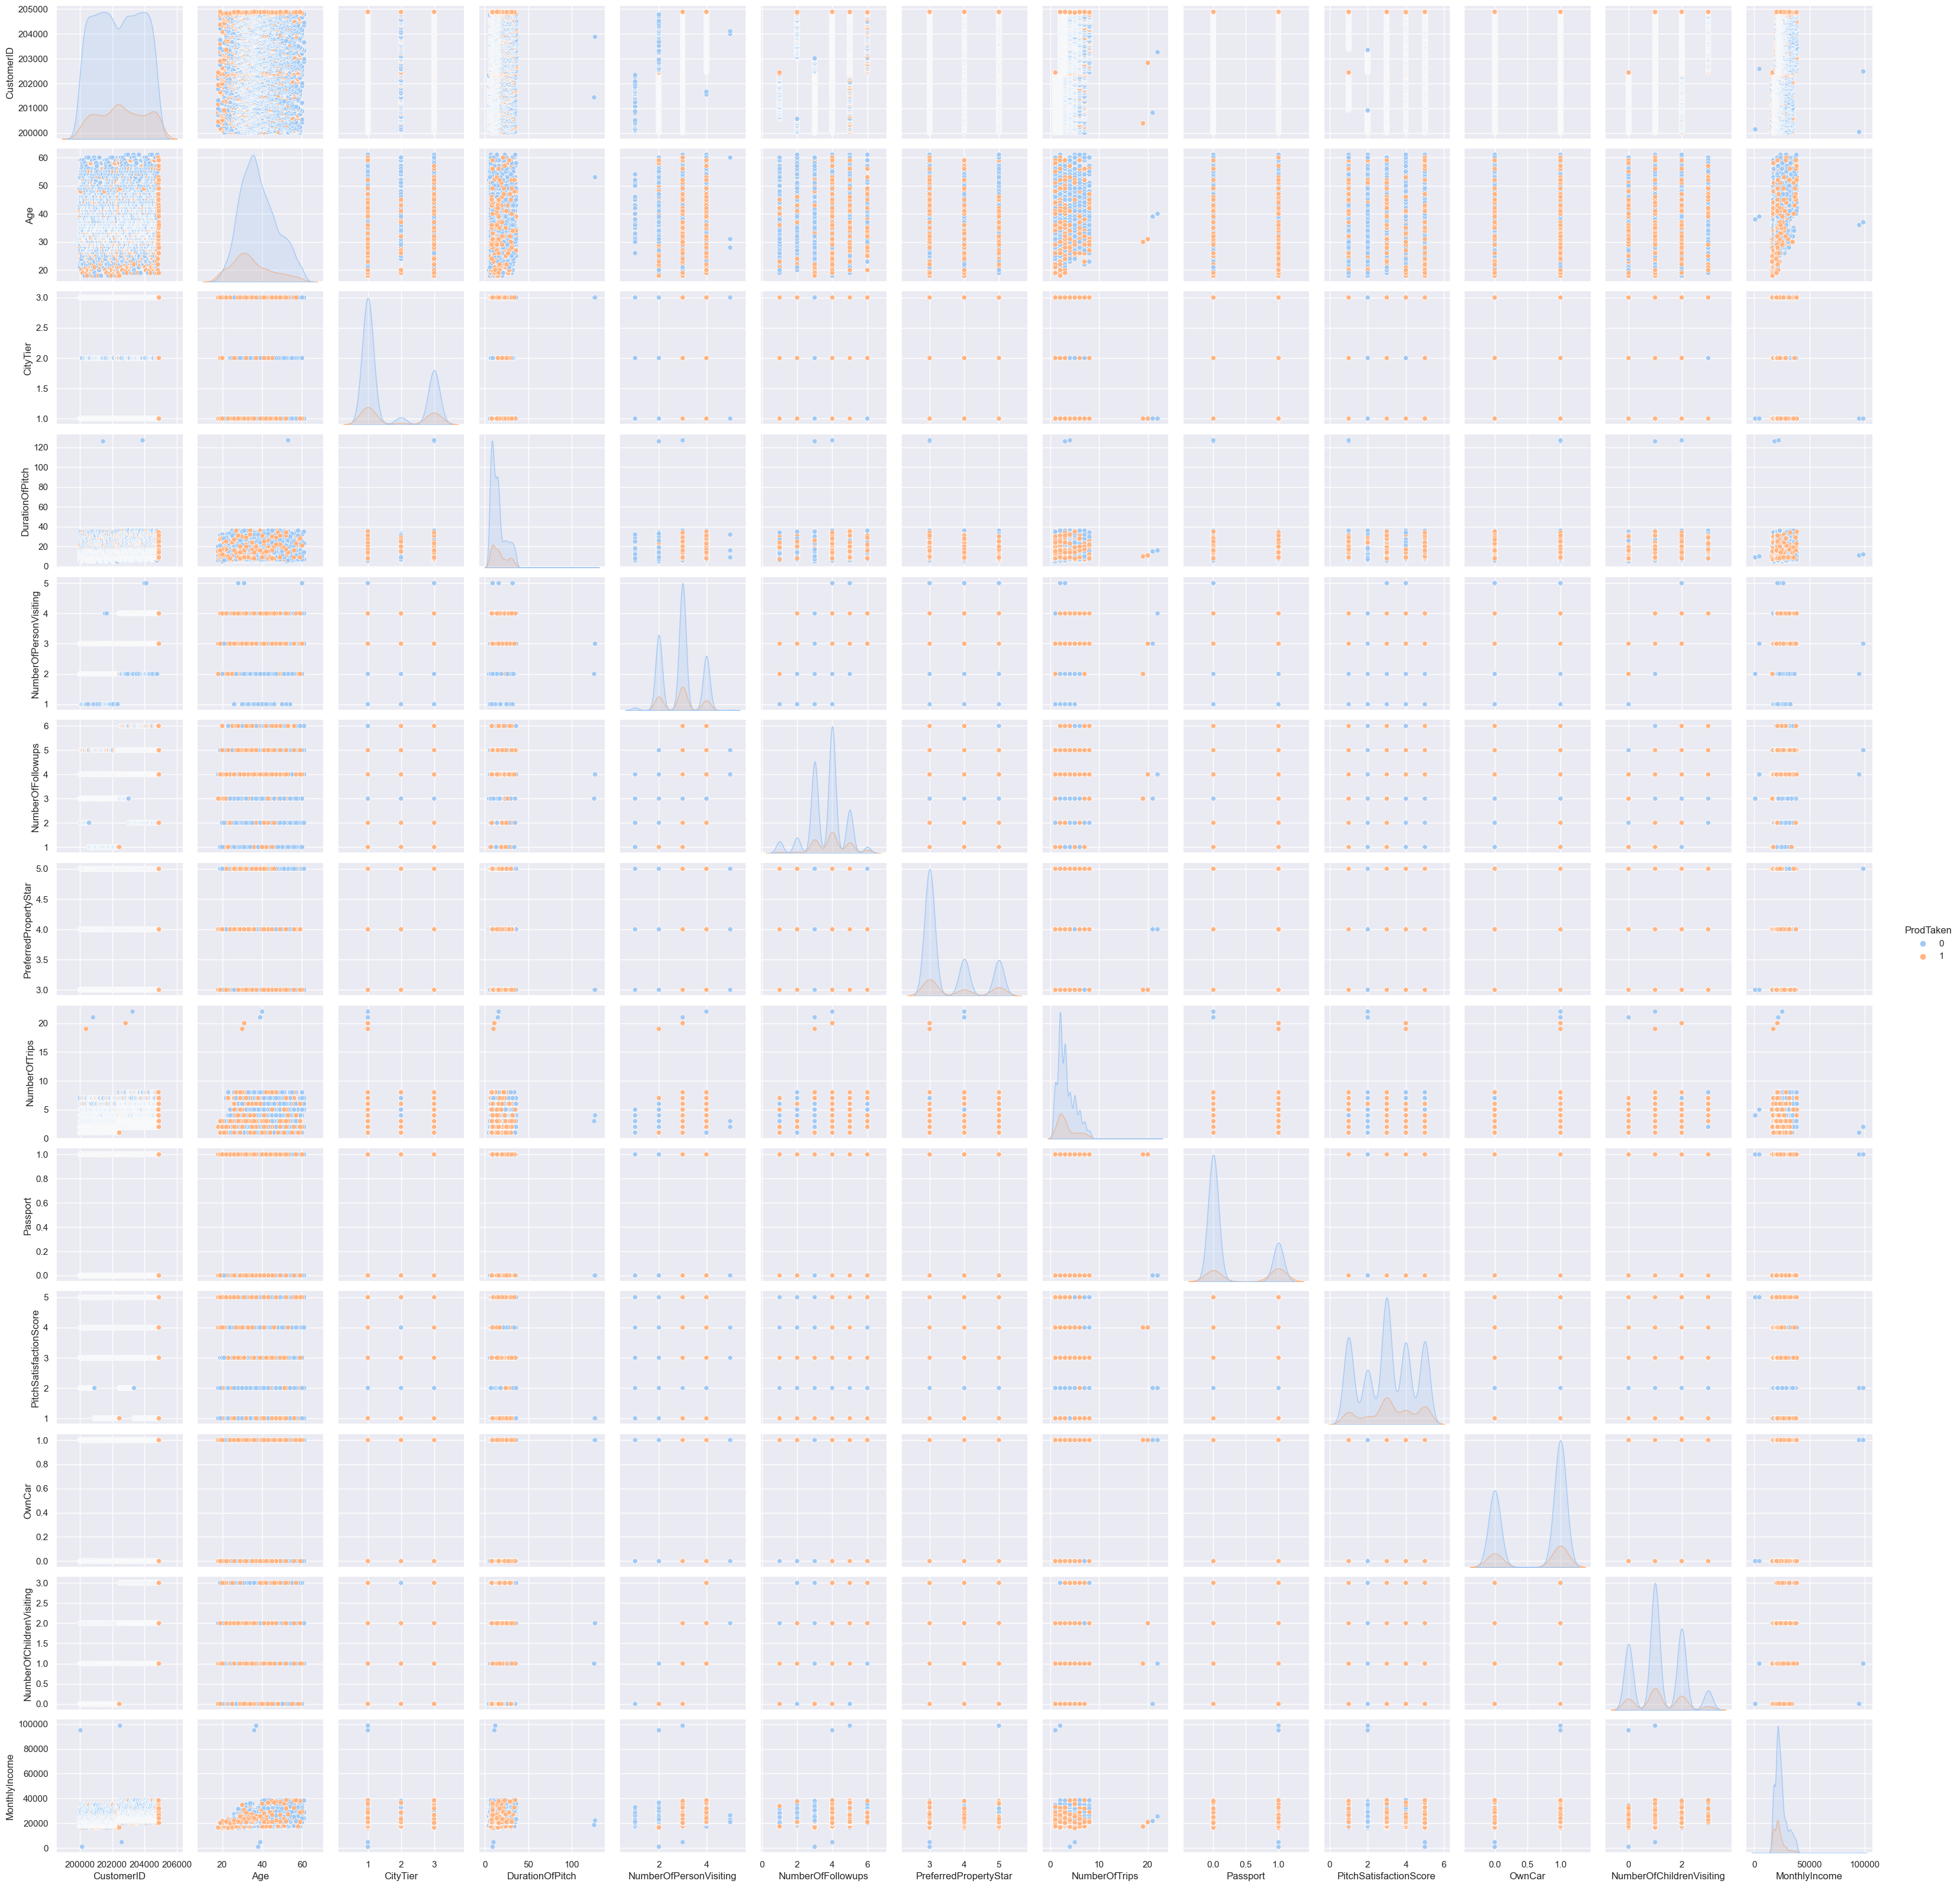

In [21]:
sns.pairplot(data=df,diag_kind='kde', hue='ProdTaken')

# **DATA PREPROCESSING**

In [300]:
df = pd.read_csv(r"C:\Users\jodhi\Documents\RAKAMIN ACADEMY\FINAL PROJECT\DATASET\Travel.csv")

**MENGUBAH NILAI YANG MEMILIKI KESAMAAN ARTI**

- Kolom Gender memiliki value (Male, `Female`, `Fe Male`). sehingga value Fe Male harus diubah menjadi Female
- Kolom MaritalStatus memiliki kesamaan arti pada value ``Single`` dan ``Unmarried``. Sehingga kita satukan menjadi Single

In [301]:
print(df['Gender'].value_counts(), end="\n\n")
print(df['MaritalStatus'].value_counts())

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64


In [302]:
new_gender = [ 'Female' if i=='Fe Male' or i=='Female' else 'Male' for i in df['Gender'] ]
df['Gender']=new_gender

marital = [ 'Single' if i == 'Unmarried' else i for i in df['MaritalStatus'] ]
df['MaritalStatus'] = marital


print("Value count gender : \n", df['Gender'].value_counts(),end="\n\n")
print("Value count maritalstatus : \n", df['MaritalStatus'].value_counts())

Value count gender : 
 Male      2916
Female    1972
Name: Gender, dtype: int64

Value count maritalstatus : 
 Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64


## **1. Data Cleansing**

In [303]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

### **A. Handle Missing Values**

**NUMERICAL**

In [304]:
#ISI MISSING VALUE DATA NUMERICAL
# Menggunakan mean pada fitur Age, Karena data berdistribusi normal
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Menggunakan Median pada kolom DurationOfPitch dan MonthlyIncome, karena terdistribusi skewed dan mempunyai outlier
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

**CATEGORICAL**

In [305]:
col_cat_missing = ['TypeofContact','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting']
for i in col_cat_missing:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [306]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

**MENGUBAH TIPE DATA**
- Terdapat kolom dengan tipe data yang kurang sesuai, yaitu kolom `NumberOfChildrenVisiting`, `NumberOfFollowups`, `PreferredPropertyStar`, `NumberOfTrips` & `Age` yang bertipe data float sehingga nantinya harus kita rubah menjadi tipe data integer.

In [307]:
subset = ['NumberOfChildrenVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Age']
df[subset] = df[subset].astype(dtype='int64',errors='ignore')

### **B. Handle Duplicated Data**
- Tidak ada data duplikat. Artinya dataset tersebut terdiri dari data customer yang berbeda beda

In [308]:
print("Jumlah ID Customer Duplicated : ", df.duplicated(subset='CustomerID').sum() )
print("Jumlah Data duplikat : ",df.duplicated().sum())

Jumlah ID Customer Duplicated :  0
Jumlah Data duplikat :  0


### **C. Handle Outliers**

dimensi data sebelum remove outlier :  (4888, 20)


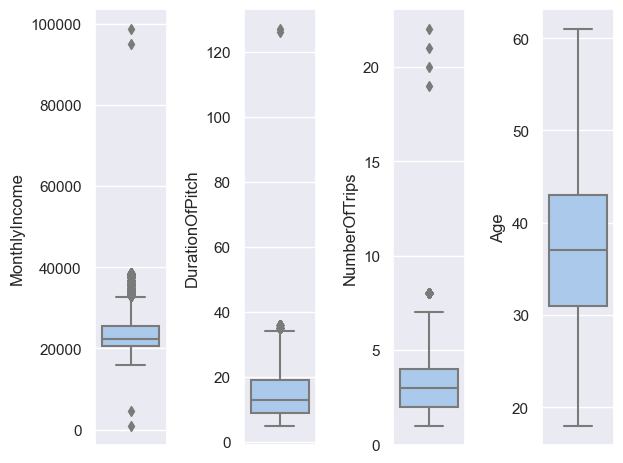

In [309]:
print("dimensi data sebelum remove outlier : ", df.shape)
subset = ['MonthlyIncome','DurationOfPitch','NumberOfTrips','Age']
for i in range( len(subset)):
    plt.subplot(1,4, i+1)
    sns.boxplot(data=df, y=df[subset[i]])
plt.tight_layout()

In [310]:
subset = ['MonthlyIncome','DurationOfPitch','NumberOfTrips']
for i in subset:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5*IQR)
    high_limit = Q3 + (1.5*IQR)
    df = df[ (df[i]>low_limit) & (df[i]<high_limit) ]

dimensi data Setelah remove outlier :  (4204, 20)


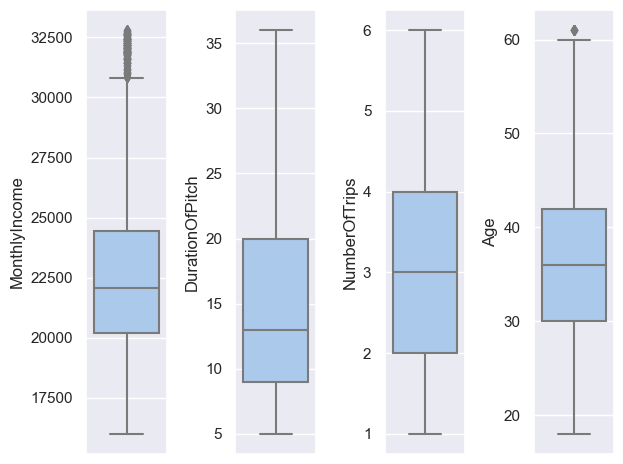

In [311]:
print("dimensi data Setelah remove outlier : ", df.shape)
subset = ['MonthlyIncome','DurationOfPitch','NumberOfTrips','Age']
for i in range( len(subset)):
    plt.subplot(1,4, i+1)
    sns.boxplot(data=df, y=df[subset[i]])
plt.tight_layout()

### **D. Feature Transformation**

In [312]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

**STANDARISASI**

In [313]:
df['MonthlyIncome'] = sc.fit_transform(df[['MonthlyIncome']])
df['DurationOfPitch'] = sc.fit_transform(df[['DurationOfPitch']])

In [314]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
df['Age'] = norm.fit_transform(df[['Age']])
df.head()

CustomerID  ProdTaken       Age    TypeofContact  CityTier  \
0      200000          1  0.534884     Self Enquiry         3   
1      200001          0  0.720930  Company Invited         1   
3      200003          0  0.348837  Company Invited         1   
4      200004          0  0.441860     Self Enquiry         1   
5      200005          0  0.325581  Company Invited         1   

   DurationOfPitch      Occupation  Gender  NumberOfPersonVisiting  \
0        -1.181400        Salaried  Female                       3   
1        -0.190235        Salaried    Male                       3   
3        -0.809713        Salaried  Female                       2   
4        -0.933609  Small Business    Male                       2   
5        -0.933609        Salaried    Male                       3   

   NumberOfFollowups ProductPitched  PreferredPropertyStar MaritalStatus  \
0                  3         Deluxe                      3        Single   
1                  4         Deluxe                      4      Divorced   
3                  3          Basic                      3      Divorced   
4                  3          Basic                      4      Divorced   
5                  3          Basic                      3        Single   

   NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
0              1         1                       2       1   
1              2         0                       3       1   
3              2         1                       5       1   
4              1         0                       5       1   
5              1         0                       5       1   

   NumberOfChildrenVisiting Designation  MonthlyIncome  
0                         0     Manager      -0.402840  
1                         2     Manager      -0.634574  
3                         1   Executive      -1.230960  
4                         0   Executive      -1.080856  
5                         1   Executive      -1.188265

<AxesSubplot:>

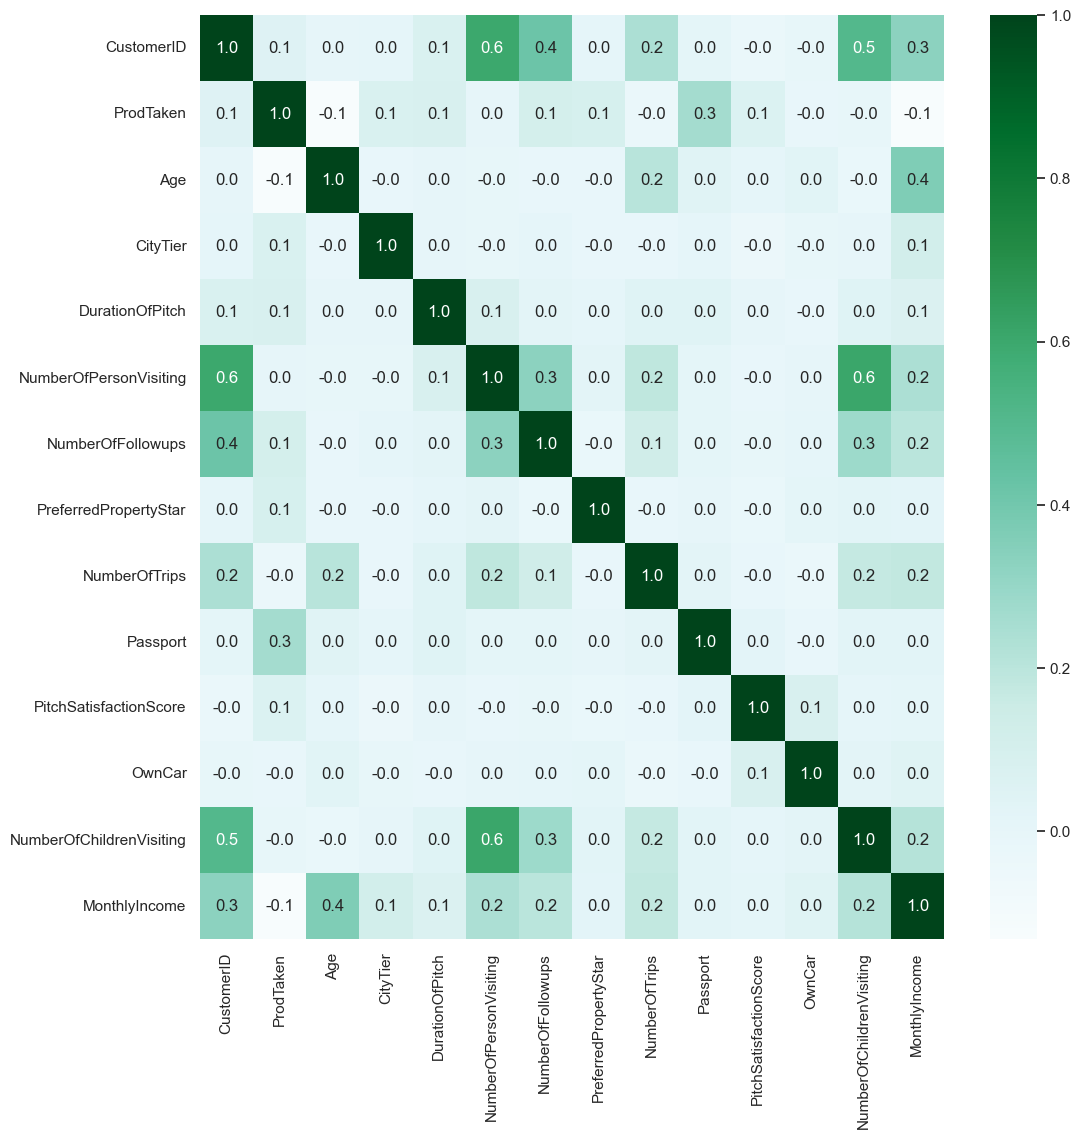

In [315]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True, fmt='.1f', cmap='BuGn')

### **E. Feature Encoding**
(Mengubah Categorical Menjadi Numeric)

In [316]:
from sklearn.preprocessing import LabelEncoder
label_endcode = LabelEncoder()

In [327]:
categorical = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']

for i in categorical:
    df[i] = label_endcode.fit_transform(df[i])
df.iloc[10:20,:]

CustomerID  ProdTaken       Age  TypeofContact  CityTier  DurationOfPitch  \
12      200012          0  0.302326              1         1         2.039888   
13      200013          0  0.372093              1         1         1.172618   
14      200014          1  0.232558              1         1         1.792096   
15      200015          0  0.255814              1         1         1.420409   
16      200016          0  0.325581              1         1        -0.561922   
17      200017          0  0.093023              0         1         0.800931   
18      200018          0  0.813953              1         3        -0.933609   
19      200019          0  0.441860              1         1        -0.933609   
20      200020          0  0.441860              0         1         0.181452   
21      200021          1  0.441860              1         3        -0.066339   

    Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
12           1       1                       2                  3   
13           2       1                       3                  3   
14           1       1                       2                  4   
15           1       0                       2                  2   
16           1       1                       3                  2   
17           2       1                       3                  2   
18           1       0                       3                  4   
19           1       1                       2                  3   
20           1       0                       3                  2   
21           1       1                       2                  4   

    ProductPitched  PreferredPropertyStar  MaritalStatus  NumberOfTrips  \
12               0                      3              1              2   
13               0                      3              1              1   
14               0                      3              2              6   
15               3                      5              1              2   
16               0                      4              1              1   
17               0                      3              1              2   
18               4                      3              0              3   
19               0                      3              2              6   
20               1                      3              1              1   
21               1                      5              2              1   

    Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
12         0                       3       0                         1   
13         0                       3       0                         2   
14         1                       2       0                         0   
15         0                       5       1                         1   
16         1                       2       1                         0   
17         1                       3       0                         0   
18         0                       3       1                         0   
19         1                       4       0                         1   
20         0                       3       1                         2   
21         0                       2       0                         0   

    Designation  MonthlyIncome  
12            1      -1.230423  
13            1      -1.297553  
14            1      -1.467527  
15            3       0.667754  
16            1      -1.126505  
17            1      -1.223978  
18            0       2.130390  
19            1      -0.039262  
20            2      -0.039262  
21            2      -1.097236

### **F. Handle Class imbalance**
- Terdapat ketidak-seimbangan value antara 0 dan 1 pada target yaitu ProdTaken (value 0 = 3414) & (value 1 = 790)

In [318]:
print("Value Count ProdTaken Original\n",df['ProdTaken'].value_counts())

Value Count ProdTaken Original
 0    3414
1     790
Name: ProdTaken, dtype: int64


In [319]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

#Pemisahan fitur dan target
Target = df['ProdTaken']
Feature = df.iloc[:,2:]

Feature_resample,Target_resample = smote.fit_resample(X=Feature, y=Target)

In [320]:
print("Dimensi Smote Oversampling : ",Target_resample.shape)
print("\n\nValue Count Prod Taken after Smote Oversampling :\n",Target_resample.value_counts())

Dimensi Smote Oversampling :  (6828,)


Value Count Prod Taken after Smote Oversampling :
 1    3414
0    3414
Name: ProdTaken, dtype: int64


**MENGGABUNGKAN `Feature_resample,Target_resample`**

In [328]:
df_resample = pd.concat([Feature_resample,Target_resample], axis=1)
df_resample.iloc[10:20,:]

Age  TypeofContact  CityTier  DurationOfPitch  Occupation  Gender  \
10  0.302326              1         1         2.039888           1       1   
11  0.372093              1         1         1.172618           2       1   
12  0.232558              1         1         1.792096           1       1   
13  0.255814              1         1         1.420409           1       0   
14  0.325581              1         1        -0.561922           1       1   
15  0.093023              0         1         0.800931           2       1   
16  0.813953              1         3        -0.933609           1       0   
17  0.441860              1         1        -0.933609           1       1   
18  0.441860              0         1         0.181452           1       0   
19  0.441860              1         3        -0.066339           1       1   

    NumberOfPersonVisiting  NumberOfFollowups  ProductPitched  \
10                       2                  3               0   
11                       3                  3               0   
12                       2                  4               0   
13                       2                  2               3   
14                       3                  2               0   
15                       3                  2               0   
16                       3                  4               4   
17                       2                  3               0   
18                       3                  2               1   
19                       2                  4               1   

    PreferredPropertyStar  MaritalStatus  NumberOfTrips  Passport  \
10                      3              1              2         0   
11                      3              1              1         0   
12                      3              2              6         1   
13                      5              1              2         0   
14                      4              1              1         1   
15                      3              1              2         1   
16                      3              0              3         0   
17                      3              2              6         1   
18                      3              1              1         0   
19                      5              2              1         0   

    PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  Designation  \
10                       3       0                         1            1   
11                       3       0                         2            1   
12                       2       0                         0            1   
13                       5       1                         1            3   
14                       2       1                         0            1   
15                       3       0                         0            1   
16                       3       1                         0            0   
17                       4       0                         1            1   
18                       3       1                         2            2   
19                       2       0                         0            2   

    MonthlyIncome  ProdTaken  
10      -1.230423          0  
11      -1.297553          0  
12      -1.467527          1  
13       0.667754          0  
14      -1.126505          0  
15      -1.223978          0  
16       2.130390          0  
17      -0.039262          0  
18      -0.039262          0  
19      -1.097236          1

## **Feature Engineering**

### **1. Feature Selection**

### **2. Feature Extraction**
1. Sales Conversion Rate (Tingkat Konversi Penjualan)
   - Fitur ini menggambarkan persentase konversi penjualan berdasarkan jumlah produk yang diambil oleh pelanggan dibandingkan dengan jumlah follow-up yang dilakukan.
   - Rumus: Sales Conversion Rate = (ProdTaken / NumberOfFollowups) * 100

2. Customer Engagement Level (Tingkat Keterlibatan Pelanggan): 
   - Fitur ini menggambarkan tingkat keterlibatan pelanggan berdasarkan jumlah follow-up yang dilakukan oleh salesperson setelah pemasaran dan tingkat kepuasan penawaran.
   - Rumus: Customer Engagement Level = (NumberOfFollowups * PitchSatisfactionScore) / 5

3. Sales Productivity (Produktivitas Penjualan): 
   - Fitur ini menggambarkan produktivitas penjualan berdasarkan jumlah follow-up yang dilakukan oleh salesperson setelah pemasaran dan durasi kontak.
   - Rumus: Sales Productivity = NumberOfFollowups / DurationOfPitch

4. Income per Trip (Pendapatan per Perjalanan): 
   - Fitur ini menggambarkan pendapatan rata-rata yang diperoleh dari perjalanan pelanggan dalam setahun.
   - Rumus: Income per Trip = MonthlyIncome * NumberOfTrips
5. Income per Trip:
   - Penjelasan: Menghitung rata-rata pendapatan bulanan pelanggan per jumlah perjalanan yang dilakukan. Fitur ini membantu dalam memahami hubungan antara pendapatan pelanggan dengan frekuensi perjalanan yang mereka lakukan.
   - Rumus: Income per Trip = MonthlyIncome / NumberOfTrips

In [345]:
df_resample['Sales_Conversion_Rate'] = round( df_resample['ProdTaken'] / df_resample['NumberOfFollowups']*100,2)
df_resample['Sales_productivity'] = df_resample['NumberOfFollowups'] / df_resample['DurationOfPitch']
df_resample['Income_per_trip'] = df_resample['MonthlyIncome'] / df_resample['NumberOfTrips'] 
df_resample

Age  TypeofContact  CityTier  DurationOfPitch  Occupation  Gender  \
0     0.534884              1         3        -1.181400           1       0   
1     0.720930              0         1        -0.190235           1       1   
2     0.348837              0         1        -0.809713           1       0   
3     0.441860              1         1        -0.933609           2       1   
4     0.325581              0         1        -0.933609           1       1   
...        ...            ...       ...              ...         ...     ...   
6823  0.348837              1         1        -0.933609           1       0   
6824  0.418605              1         1         0.800931           1       0   
6825  0.581395              1         3        -0.066339           2       0   
6826  0.356819              0         1        -0.767190           1       1   
6827  0.046512              1         3         1.604078           1       1   

      NumberOfPersonVisiting  NumberOfFollowups  ProductPitched  \
0                          3                  3               1   
1                          3                  4               1   
2                          2                  3               0   
3                          2                  3               0   
4                          3                  3               0   
...                      ...                ...             ...   
6823                       2                  3               0   
6824                       2                  1               0   
6825                       2                  5               1   
6826                       3                  3               0   
6827                       3                  4               0   

      PreferredPropertyStar  ...  Passport  PitchSatisfactionScore  OwnCar  \
0                         3  ...         1                       2       1   
1                         4  ...         0                       3       1   
2                         3  ...         1                       5       1   
3                         4  ...         0                       5       1   
4                         3  ...         0                       5       1   
...                     ...  ...       ...                     ...     ...   
6823                      5  ...         0                       3       1   
6824                      5  ...         0                       1       1   
6825                      3  ...         0                       1       0   
6826                      5  ...         1                       5       1   
6827                      3  ...         1                       1       1   

      NumberOfChildrenVisiting  Designation  MonthlyIncome  ProdTaken  \
0                            0            2      -0.402840          1   
1                            2            2      -0.634574          0   
2                            1            1      -1.230960          0   
3                            0            1      -1.080856          0   
4                            1            1      -1.188265          0   
...                        ...          ...            ...        ...   
6823                         0            1      -1.285201          1   
6824                         0            1      -1.275534          1   
6825                         0            2      -0.576573          1   
6826                         2            1      -0.774110          1   
6827                         1            1      -0.512712          1   

      Sales_Conversion_Rate  Sales_productivity  Income_per_trip  
0                     33.33           -2.539360        -0.402840  
1                      0.00          -21.026659        -0.317287  
2                      0.00           -3.705016        -0.615480  
3                      0.00           -3.213337        -1.080856  
4                      0.00           -3.213337        -1.188265  
...                     ...  

<AxesSubplot:>

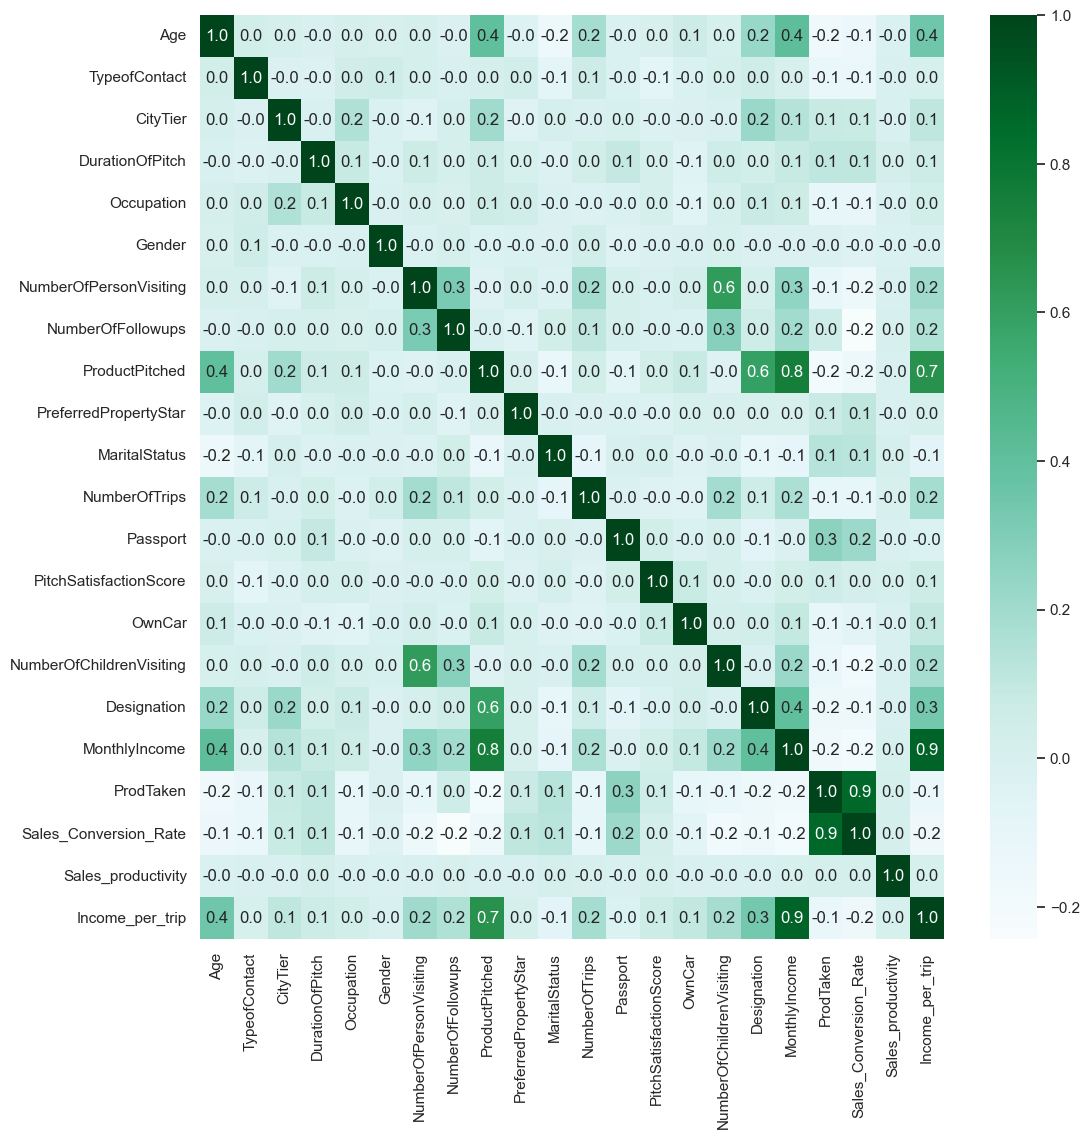

In [347]:
plt.figure(figsize=(12,12))
sns.heatmap(df_resample.corr(),annot=True, fmt='.1f', cmap='BuGn')

# Modelling

#### Logistic Regression

In [274]:
list_drop_column = ['ProductPitched','NumberOfChildrenVisiting']
X = Feature_resample.drop(columns=list_drop_column)
y = Target_resample

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [275]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train

LogisticRegression()

In [280]:
from sklearn.metrics import classification_report
y_pred = logreg.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1086
           1       0.66      0.69      0.68       963

    accuracy                           0.69      2049
   macro avg       0.69      0.69      0.69      2049
weighted avg       0.69      0.69      0.69      2049



In [277]:
sample_test = [[0.534884,1,3,-1.181400,1,0,3,3,3,2,1,1,2,1,2,-0.402840]]
y_pred = logreg.predict(sample_test)
y_pred

c:\Users\jodhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)